# Import libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# Read dataset and handle missing 

In [2]:
# read dataset 
data=fetch_openml(name="credit-g", as_frame=True)
# print("data=", data.frame)
# print("type=",type(data.frame))
df=data.frame
##count number of missing in the dataset
print("number of missing at each attribute:")
print(df.isnull().sum())
## number of rows before removing the missing entries
print("number of rows before removing missing entries:", df.shape[0])
## remove missing entries 
df=df.dropna()
## number of rows after removing the missing entries
print("number of rows after removing missing entries:", df.shape[0])

number of missing at each attribute:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64
number of rows before removing missing entries: 1000
number of rows after removing missing entries: 1000


# Feature selection

In [3]:
## drop categorical: own_telephone, foreign_worker, other_payment_plans
## drop numerical: Age, residence_since, credit_amount, duration
df=df.drop(["own_telephone", "foreign_worker", "other_payment_plans","age", "residence_since", "credit_amount", "duration"], axis=1)
print(df.columns)


Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'installment_commitment', 'personal_status',
       'other_parties', 'property_magnitude', 'housing', 'existing_credits',
       'job', 'num_dependents', 'class'],
      dtype='object')


# Preprocessing

In [4]:
#scaling numeric attribute
scaler = StandardScaler()
numeric_df=df.select_dtypes(include=np.number)
num_colum_names= numeric_df.columns.tolist()
print("numeric df coumns=", num_colum_names)
print(type(numeric_df))
df[num_colum_names]= scaler.fit_transform(df[num_colum_names])
print(df)


numeric df coumns= ['installment_commitment', 'existing_credits', 'num_dependents']
<class 'pandas.core.frame.DataFrame'>
    checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existi

In [5]:
categ_attributes=df.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()
print("categ_attributes=", categ_attributes)
## encode diagnosis 
encoder= LabelEncoder()
for att_name in categ_attributes:
    df[att_name]=encoder.fit_transform(df[att_name])
print(df)

categ_attributes= ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'housing', 'job', 'class']
     checking_status  credit_history  purpose  savings_status  employment  \
0                  1               1        6               4           3   
1                  0               3        6               2           0   
2                  3               1        2               2           1   
3                  1               3        3               2           1   
4                  1               2        4               2           0   
..               ...             ...      ...             ...         ...   
995                3               3        3               2           1   
996                1               3        9               2           0   
997                3               3        6               2           3   
998                1               3        6 

# splitting dataset

In [6]:
X, Y= df.iloc[:, :-1], df.iloc[:, -1]
# print(X)
# print(Y)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#  test_size=0.33, random_state=0)
train, validate, test = np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
# print("train=", train)
# print("validation=", validate)
# print("test=", test)

x, x_test, y, y_test = train_test_split(X, Y,test_size=0.1,train_size=0.9)
x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size = 1/9.0,train_size =8/9.0)
print("size of training=", x_train.shape[0])
print("size of validate=", x_validate.shape[0])
print("size of test=", x_test.shape[0])


size of training= 800
size of validate= 100
size of test= 100


# training classifier

score= 0.72
score= 0.69
score= 0.73
score= 0.65
score= 0.71
score= 0.7
score= 0.72
score= 0.7
score= 0.7
score= 0.72
score= 0.73
score= 0.75
score= 0.73
score= 0.74
score= 0.73
score= 0.76
score= 0.74
score= 0.76
score= 0.76
score= 0.76


Text(0,0.5,'score')

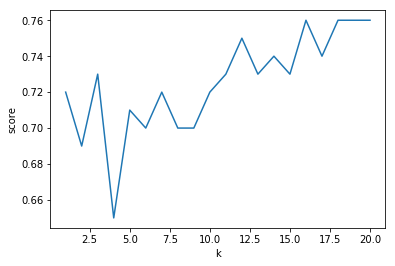

In [7]:
## train classifier 
score_ls=[]
for K in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(x_train, y_train)
    # y_validate = model.predict(x_validate)
    # print("y_pred=",y_validate)
    score=model.score(x_validate,y_validate)
    print("score=",score)
    score_ls.append(score)
plt.plot(range(1,21),score_ls)
plt.xlabel("k")
plt.ylabel("score")

# comment 
from the graph, one can see that the best k value that gives highest score is 20

In [8]:
##test classifier at k=10
model = KNeighborsClassifier(n_neighbors=20)
model.fit(x_train, y_train)
score=model.score(x_test,y_test)
print("score=",score)
score_ls.append(score)
##confusion matrix
y_pred=model.predict(x_test)
print(confusion_matrix(y_test, y_pred))

score= 0.6
[[ 7 27]
 [13 53]]


In [11]:
model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(x_train, y_train)
score=model.score(x_test,y_test)
print("score=",score)
score_ls.append(score)
##confusion matrix
y_pred=model.predict(x_test)
print(confusion_matrix(y_test, y_pred))

score= 0.64
[[ 0 34]
 [ 2 64]]
